2.Utilize uma rede neural perceptron de múltiplas camadas para aproximar a função analítica.

Com base na função gere o conjunto de treinamento e de teste. Defina a arquitetura da rede
e a realize o treinamento. Apresente um gráfico com a curva da função analítica e a curva
da função aproximada pela rede neural. Apresente também a curva da função custo no treinamento
e a curva do erro médio quadrado com relação ao o conjunto de validação. Procure
definir a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de
neurônios em cada camada e o número de neurônios camada de saída.
Observação. Como se trata de um problema de aproximação de funções, considere a camada
de saída do tipo linear puro.

## 1. Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Geração e Preparação dos Dados

In [ ]:
# Gerar Dados
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = X1**2 + x2**2 + 2*X1*X2 + np.cos(X1 + X2) - 1

X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y.ravel()

print("Quantidade de dados em x1:", len(x1))
print("Demonstração dos dados em x1:", x1)
print("Quantidade de dados em x2:", len(x2))
print("Demonstração dos dados em x2:", x2)

Quantidade de dados em x1: 100
Demonstração dos dados em x1: [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2

In [ ]:
# Dividir dados em conjuntos de treinamento e validação

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Construção da Rede Neural

Arquitetura:

* Camadas densas (Dense): Cada camada aplica uma transformação linear seguida de uma ativação relu (exceto a última camada, que usa linear para regressão).

* Camada de entrada espera 2 valores (as coordenadas (𝑥1,𝑥2)).

* A saída é escalar, correspondente ao valor previsto da função 𝑦.

* **perda**: mean_squared_error minimiza o erro quadrático médio.

* **otimizador**: adam é eficiente para redes profundas.

Treina o modelo por 100 épocas, registrando o erro no conjunto de treinamento e validação.


In [ ]:
# Construir a rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    loss =  'mean_squared_error',
    optimizer = 'adam',
)

historico = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))
#

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 466.2148 - val_loss: 25.0531
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.7184 - val_loss: 9.0682
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3970 - val_loss: 3.7143
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9176 - val_loss: 1.2478
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0095 - val_loss: 0.6675
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6010 - val_loss: 0.5525
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4999 - val_loss: 0.4456
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4145 - val_loss: 0.3564
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3923 - val_loss: 0.3947
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3284 - val_loss: 0.2514
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3113 - val_loss: 0.2146
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━

## 4. Predição e Visualização

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 0.92, 'Função Prevista')

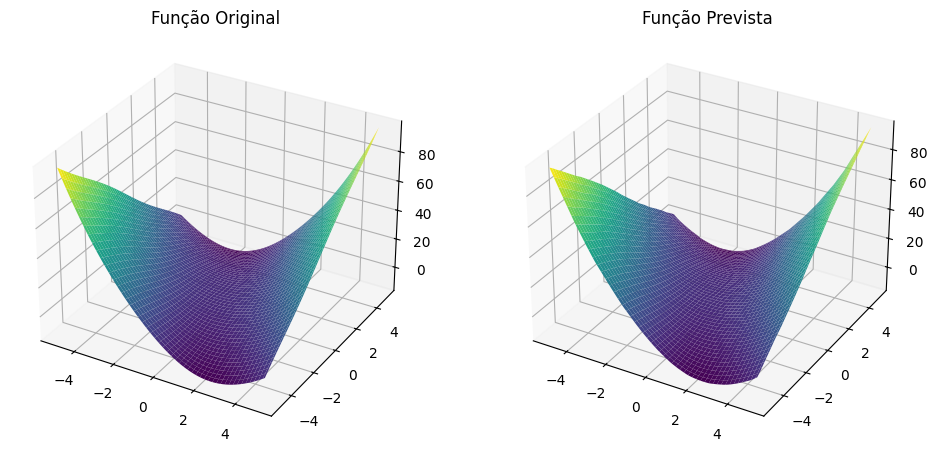

In [ ]:
y_pred = model.predict(X)

fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_title('Função Original')

y_pred = y_pred.reshape(X1.shape)
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X1, X2, y_pred, cmap='viridis')
ax.set_title('Função Prevista')

## 5. Análise do Treinamento

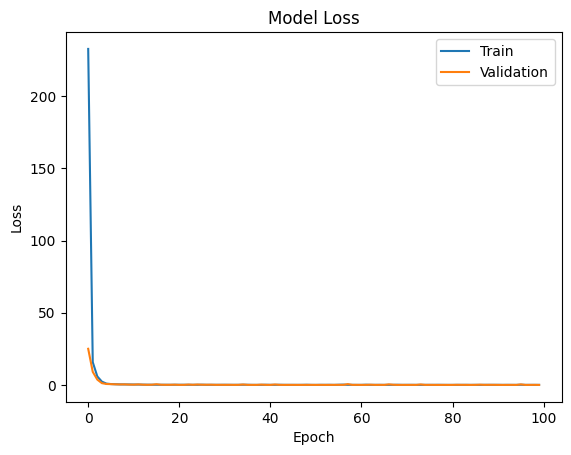

In [ ]:
plt.figure()
plt.plot(historico.history['loss'], label='Treino')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()